In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_json('TelecomX_Data.json')

In [3]:
df. head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Criando uma copia do DataFrame

In [4]:
df_raw = df.copy()

transformando a chave de cada celula em  colunas separadas nas colunas originais

In [5]:
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)

transformando os  dados aninhados em uma tabela plana, pronta para análise.

In [6]:
df_clean = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)



No codigo abaixo verifica-se a estrutura e a presença  de dados faltantes no DataFrame

In [7]:
df_clean.info()
df_clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges             0
dtype: int64

No DataFrame que vimos acima a coluna Charge esta como  object, então no codigo a seguir estamos conertendo para numerico.

In [8]:
df_clean['Charges'] = pd.to_numeric(df_clean['Charges'], errors='coerce')

Aqui agora verificamos quantos valores nulos(NaN) podem existir na coluna Charger após a conversão

In [9]:
df_clean['Charges'].isnull().sum()


np.int64(7267)

In [10]:
df_clean['Charges'].head()  # Ver os primeiros valores
df_clean['Charges'].dtype   # Ver o tipo de dado da coluna
df_clean['Charges'].isnull().sum()  # Quantos NaNs existem

np.int64(7267)

In [11]:
print(df.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [12]:
print(df_clean.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')


No codogo acima nos mostra que as colunas ja estão porntas para analise

In [13]:
print(df_account.columns)

Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'], dtype='object')


Vamos exibir as 10 primeiras linhas da coluna Charges do DataFrame para conferir se esta tudo certo.

In [14]:

print(df_account['Charges'].head(10))


0       {'Monthly': 65.6, 'Total': '593.3'}
1       {'Monthly': 59.9, 'Total': '542.4'}
2      {'Monthly': 73.9, 'Total': '280.85'}
3     {'Monthly': 98.0, 'Total': '1237.85'}
4       {'Monthly': 83.9, 'Total': '267.4'}
5      {'Monthly': 69.4, 'Total': '571.45'}
6    {'Monthly': 109.7, 'Total': '7904.25'}
7     {'Monthly': 84.65, 'Total': '5377.8'}
8      {'Monthly': 48.2, 'Total': '340.35'}
9     {'Monthly': 90.45, 'Total': '5957.9'}
Name: Charges, dtype: object


In [15]:
print(df['account'].head(10))

0    {'Contract': 'One year', 'PaperlessBilling': '...
1    {'Contract': 'Month-to-month', 'PaperlessBilli...
2    {'Contract': 'Month-to-month', 'PaperlessBilli...
3    {'Contract': 'Month-to-month', 'PaperlessBilli...
4    {'Contract': 'Month-to-month', 'PaperlessBilli...
5    {'Contract': 'Month-to-month', 'PaperlessBilli...
6    {'Contract': 'Two year', 'PaperlessBilling': '...
7    {'Contract': 'Two year', 'PaperlessBilling': '...
8    {'Contract': 'Month-to-month', 'PaperlessBilli...
9    {'Contract': 'Two year', 'PaperlessBilling': '...
Name: account, dtype: object


In [16]:
print(df['account'].apply(lambda x: x.get('Charges')).head(10))


0       {'Monthly': 65.6, 'Total': '593.3'}
1       {'Monthly': 59.9, 'Total': '542.4'}
2      {'Monthly': 73.9, 'Total': '280.85'}
3     {'Monthly': 98.0, 'Total': '1237.85'}
4       {'Monthly': 83.9, 'Total': '267.4'}
5      {'Monthly': 69.4, 'Total': '571.45'}
6    {'Monthly': 109.7, 'Total': '7904.25'}
7     {'Monthly': 84.65, 'Total': '5377.8'}
8      {'Monthly': 48.2, 'Total': '340.35'}
9     {'Monthly': 90.45, 'Total': '5957.9'}
Name: account, dtype: object


Nos codigos acima nos mostrou que ainda tinhamos problemas com a coluna Charges. então vamos fazer um codigo que vai nos ajudar a diexar a coluna charge em duas coluna numericas separadas.


In [17]:
# Extrair 'Monthly' e 'Total' da chave 'Charges' do dicionário em 'account'
df_account['MonthlyCharges'] = df['account'].apply(lambda x: x.get('Charges').get('Monthly') if x.get('Charges') else None)
df_account['TotalCharges'] = df['account'].apply(lambda x: x.get('Charges').get('Total') if x.get('Charges') else None)

# Converter TotalCharges para numérico
df_account['TotalCharges'] = pd.to_numeric(df_account['TotalCharges'], errors='coerce')

# Verificar resultado
print(df_account[['MonthlyCharges', 'TotalCharges']].head())
print(df_account[['MonthlyCharges', 'TotalCharges']].dtypes)


   MonthlyCharges  TotalCharges
0            65.6        593.30
1            59.9        542.40
2            73.9        280.85
3            98.0       1237.85
4            83.9        267.40
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [18]:
# Remover a coluna 'Charges' antiga de df_account
df_account = df_account.drop(columns=['Charges'])

# Concatenar tudo de novo para formar o df_clean completo
df_clean = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Verificar o resultado final
print(df_clean.head())
print(df_clean.dtypes)


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [19]:
# Substituir strings vazias por NaN
df_clean['Churn'] = df_clean['Churn'].replace('', pd.NA)

# Remover linhas onde Churn está vazio (NaN)
df_clean = df_clean.dropna(subset=['Churn'])

# Verificar novamente
print(df_clean['Churn'].value_counts())


Churn
No     5174
Yes    1869
Name: count, dtype: int64


Agora vamos inicIar as análises.

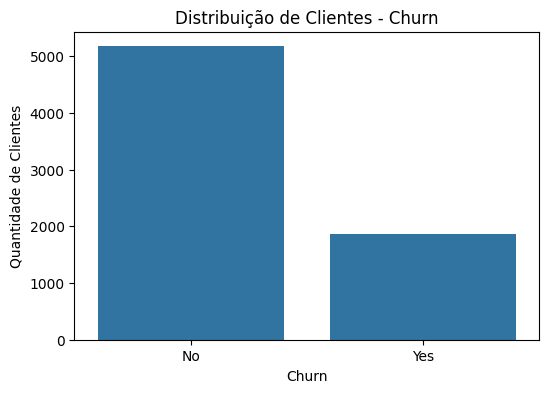

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [20]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Churn')
plt.title('Distribuição de Clientes - Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Mostrar porcentagem
churn_percent = df_clean['Churn'].value_counts(normalize=True) * 100
print(churn_percent)


Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


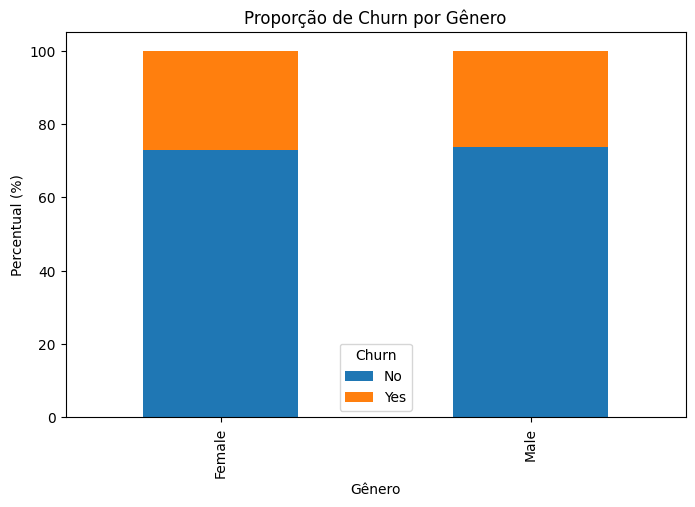

In [21]:
# Proporção de churn por gênero
churn_gender = df_clean.groupby(['gender', 'Churn']).size().unstack()
churn_gender_percent = churn_gender.div(churn_gender.sum(axis=1), axis=0) * 100
print(churn_gender_percent)

# Gráfico de barras empilhadas (churn por gênero)
churn_gender_percent.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Proporção de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Percentual (%)')
plt.legend(title='Churn')
plt.show()



Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


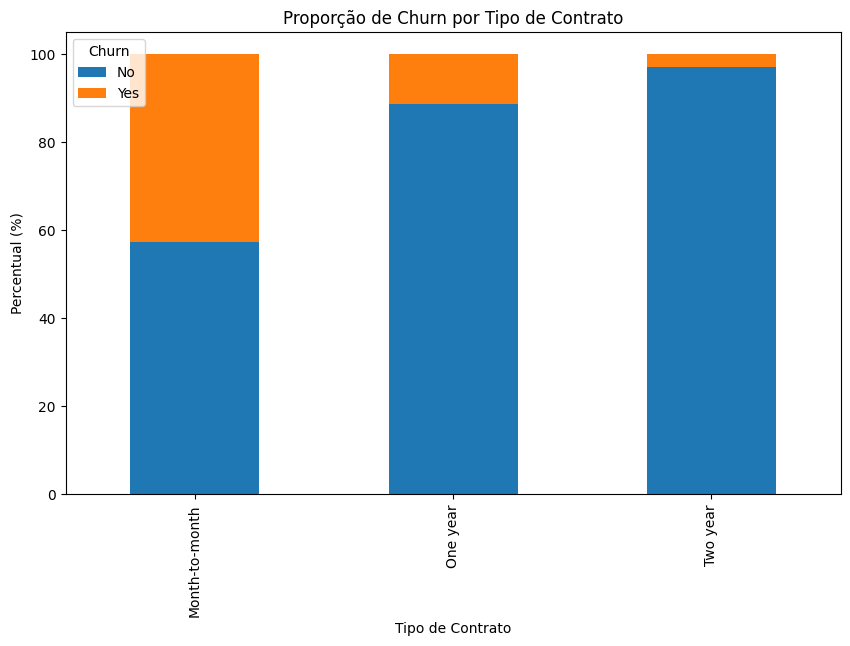

In [22]:
# Proporção de churn por tipo de contrato
churn_contract = df_clean.groupby(['Contract', 'Churn']).size().unstack()
churn_contract_percent = churn_contract.div(churn_contract.sum(axis=1), axis=0) * 100
print(churn_contract_percent)

# Gráfico de barras empilhadas para churn por contrato
churn_contract_percent.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Proporção de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Percentual (%)')
plt.legend(title='Churn')
plt.show()





Churn               No        Yes
TenureGroup                      
0-12 meses   51.715805  48.284195
13-24 meses  70.487106  29.512894
25-48 meses  79.125616  20.874384
49-60 meses  85.000000  15.000000
61-72 meses  91.703836   8.296164
72+ meses    98.342541   1.657459


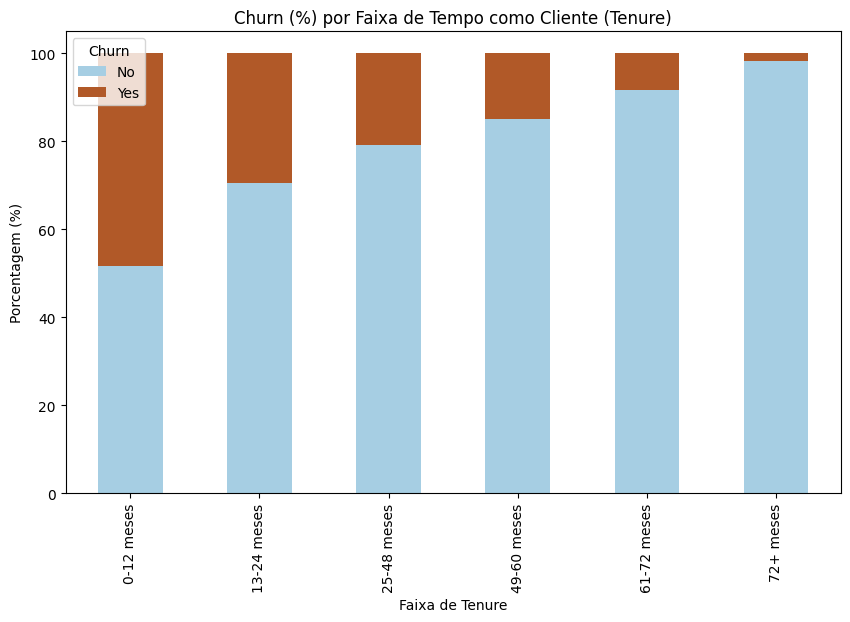

In [23]:
# Criar faixas de tempo de contrato (tenure)
bins = [0, 12, 24, 48, 60, 72, 1000]
labels = ['0-12 meses', '13-24 meses', '25-48 meses', '49-60 meses', '61-72 meses', '72+ meses']

df_clean['TenureGroup'] = pd.cut(df_clean['tenure'], bins=bins, labels=labels, right=False)

# Ver a distribuição por TenureGroup x Churn
tenure_churn = pd.crosstab(df_clean['TenureGroup'], df_clean['Churn'], normalize='index') * 100

print(tenure_churn)

# Gráfico de barras empilhadas
tenure_churn.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Churn (%) por Faixa de Tempo como Cliente (Tenure)')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Faixa de Tenure')
plt.legend(title='Churn')
plt.show()


Churn               No        Yes
TenureGroup                      
0-12 meses   51.715805  48.284195
13-24 meses  70.487106  29.512894
25-48 meses  79.125616  20.874384
49-60 meses  85.000000  15.000000
61-72 meses  91.703836   8.296164
72+ meses    98.342541   1.657459


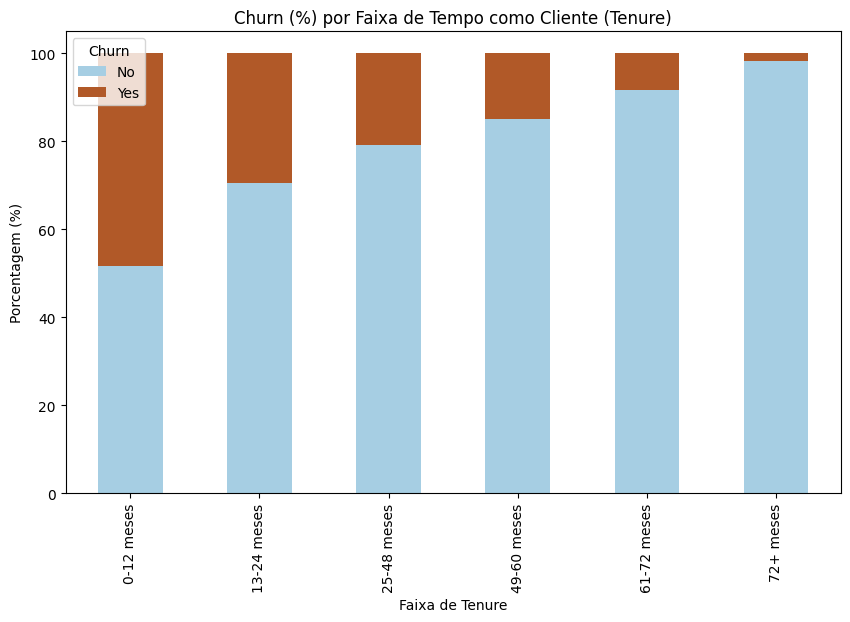

In [24]:

import matplotlib.pyplot as plt

# Criar faixas de tempo de contrato (tenure)
bins = [0, 12, 24, 48, 60, 72, 1000]
labels = ['0-12 meses', '13-24 meses', '25-48 meses', '49-60 meses', '61-72 meses', '72+ meses']

df_clean['TenureGroup'] = pd.cut(df_clean['tenure'], bins=bins, labels=labels, right=False)

# Ver a distribuição por TenureGroup x Churn
tenure_churn = pd.crosstab(df_clean['TenureGroup'], df_clean['Churn'], normalize='index') * 100

print(tenure_churn)

# Gráfico de barras empilhadas
tenure_churn.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Churn (%) por Faixa de Tempo como Cliente (Tenure)')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Faixa de Tenure')
plt.legend(title='Churn')
plt.show()


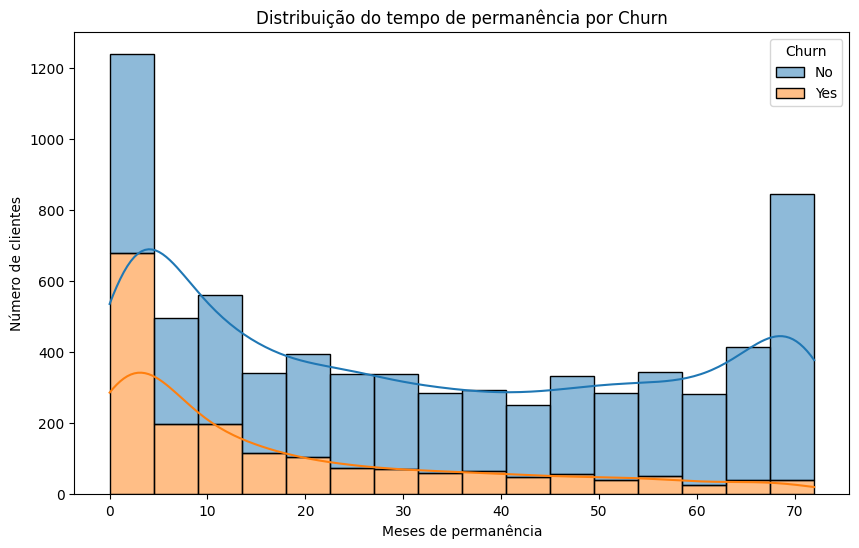

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição do tempo de permanência por Churn')
plt.xlabel('Meses de permanência')
plt.ylabel('Número de clientes')
plt.show()


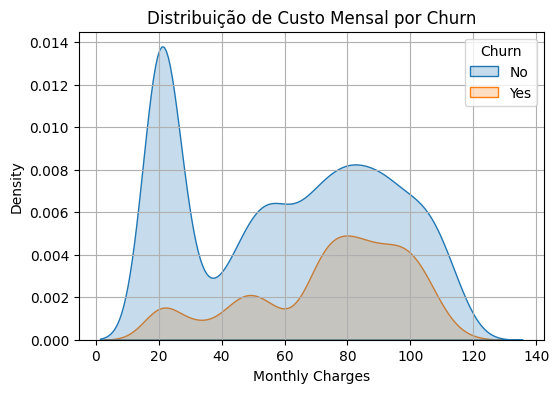

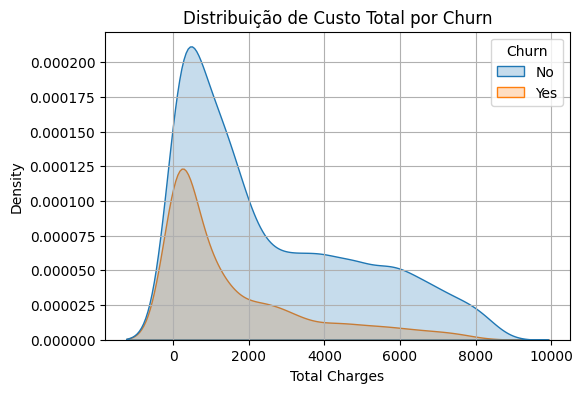

In [26]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_clean, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Distribuição de Custo Mensal por Churn')
plt.xlabel('Monthly Charges')
plt.grid(True)
plt.show()

# Gráfico 5 – Distribuição do TotalCharges por Churn
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df_clean, x='TotalCharges', hue='Churn', fill=True)
plt.title('Distribuição de Custo Total por Churn')
plt.xlabel('Total Charges')
plt.grid(True)
plt.show()

<Figure size 600x400 with 0 Axes>

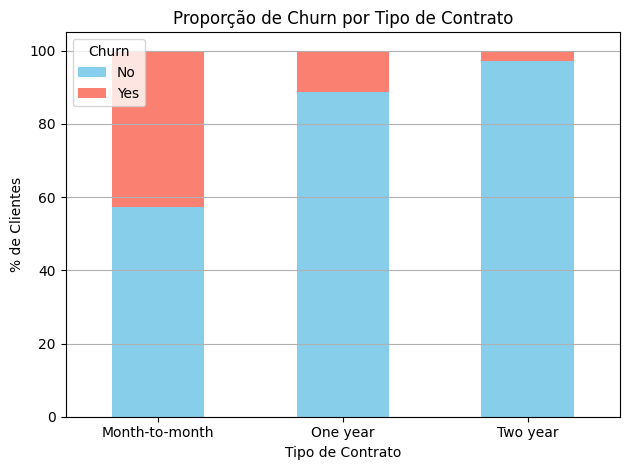

In [27]:
plt.figure(figsize=(6, 4))
df_clean.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().mul(100).plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Proporção de Churn por Tipo de Contrato')
plt.ylabel('% de Clientes')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Relatório Final**

📉 Relatório de Análises — Churn Telecom X
1. Distribuição Geral do Churn
Cerca de 26,5% dos clientes cancelaram o serviço, indicando uma taxa de churn relevante para a empresa.

73,5% dos clientes permanecem ativos, o que reforça a necessidade de estratégias para reduzir a evasão.

2. Churn por Gênero
A diferença no churn entre homens e mulheres é mínima.

Gênero não parece ser um fator determinante para a saída dos clientes.

3. Churn por Tipo de Contrato
Clientes com contrato mensal apresentam uma taxa de churn alta (~42,7%).

Contratos de longo prazo (1 ou 2 anos) apresentam churn significativamente menor.

Recomenda-se incentivar contratos mais longos para aumentar a retenção.

4. Relação entre Custo Mensal e Churn
Clientes que cancelam tendem a ter custos mensais mais elevados.

Valores altos na mensalidade podem estar associados a maior probabilidade de evasão.

5. Relação entre Custo Total e Churn
Clientes que permanecem têm um total de cobrança maior, indicando maior tempo de permanência.

Clientes com menor total cobrado têm maior propensão a sair.

Fidelizar clientes nos primeiros meses pode reduzir o churn.

✅ Conclusões
Contratos mensais e mensalidades altas são os principais fatores associados ao churn.

Gênero não é um fator relevante para a análise de evasão.

Clientes antigos tendem a permanecer, mostrando que aumentar o tempo de permanência é chave.

Estratégias de retenção devem focar em oferecer benefícios para contratos longos, rever preços e valorizar clientes novos com serviços adicionais.

